In [1]:
import cv2
import numpy as np
from google.colab import files
files.upload()

Saving Passport Size photo - Sai Mitheran.pdf to Passport Size photo - Sai Mitheran.pdf


{'Passport Size photo - Sai Mitheran.pdf': b'%PDF-1.4\n%\xf6\xe4\xfc\xdf\n1 0 obj\n<<\n/Type /Catalog\n/Version /1.4\n/Pages 2 0 R\n>>\nendobj\n2 0 obj\n<<\n/Type /Pages\n/Kids [3 0 R]\n/Count 1\n>>\nendobj\n3 0 obj\n<<\n/Type /Page\n/MediaBox [0.0 0.0 1413.0 2000.0]\n/Parent 2 0 R\n/Contents 4 0 R\n/Resources 5 0 R\n>>\nendobj\n4 0 obj\n<<\n/Filter /FlateDecode\n/Length 134\n>>\nstream\r\nx\x9c5\x8c\xbd\x0e\xc20\x10\x83w?\xc5\x8d\xb0\xa4\xf7\x13\x92\xcb\x8a\x00\x89\x11\x91\x17(- !\xb5@7\xde\x9e\x8a\n\xcb\x8b?\xd9~C\xa2\x18\x88\x7f\x96\xec\x1c\xb2\xb8\xb9e/\xb20\xe3\xe0\x1aU<o@\xdd\x80\xe68\x08\xed\x9e8\x81\xff\xbb\xe9\x8e\xe6 \x145XJ^,\'\x9f?\xeb\r\xdb\n/\x1c\xc4K\x89\x129)H=h\xe2Y\xaa^\xe6R\x8f\xd5\xb9k\xc7\xf1\xda\xd3\xe5C\xb5}-iZS}`_\xf1\x05\xe3\xfb"\x91\r\nendstream\nendobj\n5 0 obj\n<<\n/XObject <<\n/Im1 6 0 R\n>>\n/Font 7 0 R\n>>\nendobj\n6 0 obj\n<<\n/Length 158284\n/Type /XObject\n/Subtype /Image\n/Filter /DCTDecode\n/BitsPerComponent 8\n/Width 1587\n/Height 2000\n/ColorSpace 

In [2]:
files.upload()

Saving face1.jpeg to face1.jpeg


{'face1.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x12\x12\x15\x12\x12\x12\x15\x15\x15\x17\x15\x17\x18\x18\x15\x15\x15\x15\x15\x15\x15\x15\x17\x17\x17\x16\x15\x15\x17\x17\x18\x1d( \x18\x1a%\x1d\x15\x17!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x17-%\x1d\x1f--------------------------------------------------\xff\xc0\x00\x11\x08\x01\x02\x00\xc3\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x05\x06\x02\x07\x08\xff\xc4\x00=\x10\x00\x02\x01\x02\x04\x03\x05\x05\x06\x06\x02\x01\x05\x00\x00\x00\x00\x01\x02\x03\x11\x04\x05!1\x12AQ\x06aq\x81\x91\x07\x13"\xa1\xb12BR\xc1\xd1\xf0\x14\x15#b\xe1\xf1r\xb2\x92\x173CS\x82\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x01\x05\xff\xc4\x00$\x11\x00\x02\x02\x01\x03\x05\x01\x00\x03\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03\x12!

 face1.jpeg  'Passport Size photo - Sai Mitheran.pdf'   sample_data


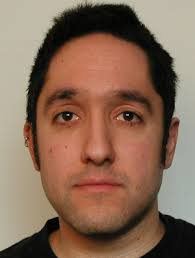

In [10]:
!ls
cv2_imshow(cv2.imread('face1.jpeg'))

In [7]:
from google.colab.patches import cv2_imshow

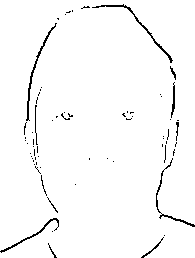

In [8]:
image = cv2.imread('face1.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 7)
edge = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 10)
cv2_imshow(edge)

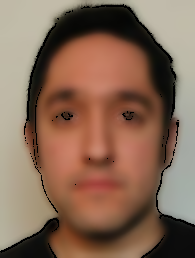

In [11]:
filtered = cv2.bilateralFilter(image, 12, 250, 250)
cartoon = cv2.bitwise_and(filtered, filtered, mask = edge)
cv2_imshow(cartoon)

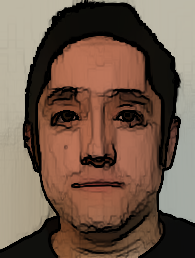

In [12]:
#Stylise the image directly

cartoon = cv2.stylization(image, sigma_s = 175, sigma_r = 0.3)
cv2_imshow(cartoon)

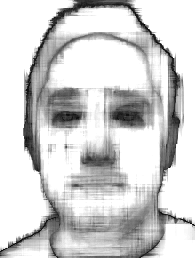

In [17]:
sketch1, sketch2 = cv2.pencilSketch(image, sigma_s = 40, sigma_r = 0.4, shade_factor = 0.015)
cv2_imshow(sketch1)

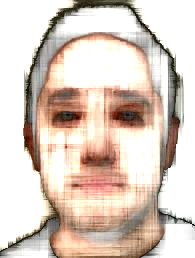

In [18]:
cv2_imshow(sketch2)

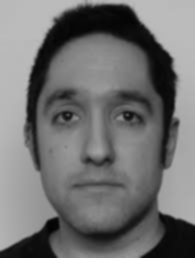

In [20]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
cv2_imshow(gray_img)

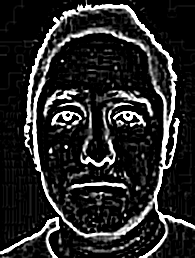

In [21]:
edge_img = cv2.Laplacian(gray_img, -1, ksize = 5)
cv2_imshow(edge_img)

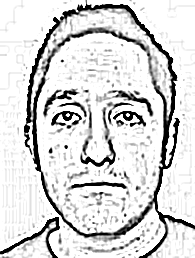

In [22]:
edge_img = 255-edge_img
cv2_imshow(edge_img)

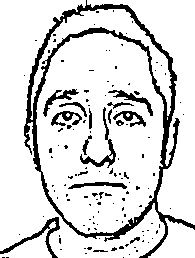

In [23]:
ret, edge_img = cv2.threshold(edge_img, 150, 255, cv2.THRESH_BINARY)
cv2_imshow(edge_img)

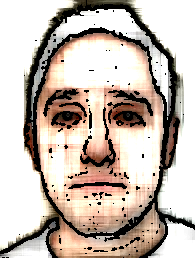

In [24]:
output = np.zeros(edge_img.shape)
output = cv2.bitwise_and(sketch2, sketch2, mask = edge_img)
cv2_imshow(output)